In [1]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [2]:
import scipy.stats as sts



### Проверим интервал для рождаемости

Двустороння альтернатива

In [3]:
sts.t.sf((3075 - 2800) / 500 * np.sqrt(25) , df=24) * 2

0.011147829812680215

In [4]:
np.array(_tconfint_generic(3075, 500 / np.sqrt(25), 24, alpha=0.05, alternative='two-sided')) - 2800

array([ 68.61014384, 481.38985616])

In [5]:
sts.t.sf((3075 - 2800) / 500 * np.sqrt(25) , df=24)

0.005573914906340107

In [6]:
np.array(_tconfint_generic(3075, 500 / np.sqrt(25), 24, alpha=0.05, alternative='l')) - 2800

array([103.91179201,          inf])

### Questions

4. Женщина Гватемалы

In [7]:
mu0 = 9.5
std0 = 0.4

mu1 = 9.57

n = 160

In [8]:
sts.norm.sf( (mu1 - mu0) / std0 * np.sqrt(n)) * 2

0.026856695507523776

5. Бриллианты

In [9]:
from sklearn import model_selection

In [10]:
import pandas as pd
import seaborn as sns
sns.set()

In [11]:
ls

ADHD.txt  diamonds.txt  stat.student_tests.ipynb  w2_lecture_notes.ipynb


In [12]:
df = pd.read_csv('diamonds.txt', delimiter='\t')

In [13]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
carat    53940 non-null float64
depth    53940 non-null float64
table    53940 non-null float64
price    53940 non-null int64
x        53940 non-null float64
y        53940 non-null float64
z        53940 non-null float64
dtypes: float64(6), int64(1)
memory usage: 2.9 MB


In [15]:
y = df.price
X = df.drop('price', axis=1)

In [16]:
X.shape, y.shape

((53940, 6), (53940,))

/home/yuri/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


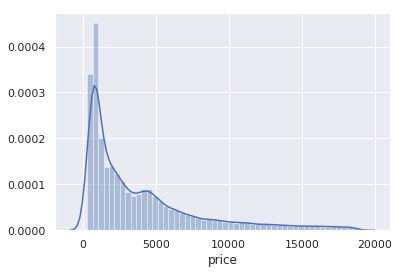

In [17]:
sns.distplot(df.price)

In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=1)

In [35]:
import sklearn, scipy

In [20]:
from sklearn import linear_model, ensemble

/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [21]:
lr_reg = sklearn.linear_model.LinearRegression().fit(X_train, y_train)

In [22]:
lr_err = lr_reg.predict(X_test) - y_test.values

/home/yuri/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


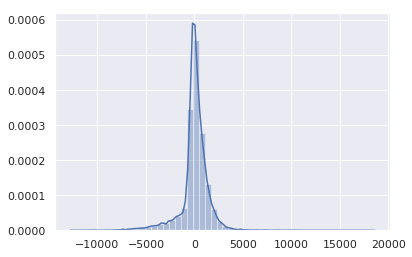

In [23]:
sns.distplot(lr_err)

In [24]:
rf_reg = sklearn.ensemble.RandomForestRegressor(random_state=1).fit(X_train, y_train)

In [25]:
rf_err = rf_reg.predict(X_test) - y_test.values

/home/yuri/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


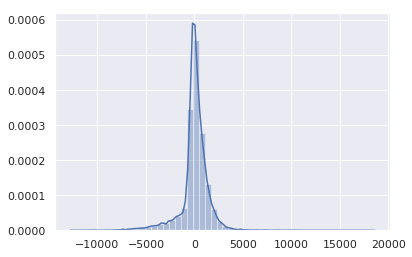

In [26]:
sns.distplot(lr_err)

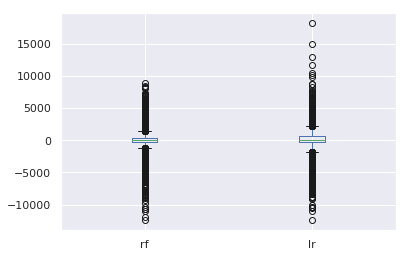

In [30]:
pd.DataFrame({'rf' : rf_err, 'lr' : lr_err}).boxplot()

In [36]:
scipy.stats.ttest_ind(rf_err, lr_err, equal_var = False)

Ttest_indResult(statistic=1.6152668674312063, pvalue=0.10626463207843163)

In [39]:
import statsmodels as sm

In [42]:
cm = sm.stats.weightstats.CompareMeans(sm.stats.weightstats.DescrStatsW(rf_err),
                                       sm.stats.weightstats.DescrStatsW(lr_err))

In [43]:
cm.tconfint_diff(usevar='unequal')

(-6.024532786893811, 62.47259061044892)